# Run MCMC sampling
# Heavy nonminimal

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

In [2]:
import numpy as np

from Likelihood import LEff
from mcmc_utils import heavy_nonminimal_mcmc

from multiprocessing import Pool
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [3]:
hierarchy = 'heavy'
D_or_M = 'majorana'
distance = 'log'
smoothing_pars = (0.1, 0.1)

In [4]:
spec = 'nonminimal'

In [5]:
this_dark_nus_mcmc = heavy_nonminimal_mcmc(hierarchy, D_or_M, title_addition=spec,
                                   distance='log', smoothing_pars=(0.1, 0.1))
df = this_dark_nus_mcmc.provide_df('cut_based')

heavy majorana


In [6]:
ndim = 4
from ctau_utils import ctau_heavy
def heavy_nonminimal_posterior(parameters):
    '''Posterior in the nonminimal model: parameters = [m4, mz, log10_mu_Vmu4_alpha_epsilon2, log10_Valpha4_alpha_epsilon2]
       It uses global pars to speed up parallel computation'''
    if (parameters[0] < this_dark_nus_mcmc.exp_analysis_obj.m4_limits[0]) or\
       (parameters[0] > this_dark_nus_mcmc.exp_analysis_obj.m4_limits[1]) or\
       (parameters[1] < this_dark_nus_mcmc.exp_analysis_obj.mz_limits[0]) or\
       (parameters[1] > this_dark_nus_mcmc.exp_analysis_obj.mz_limits[1]) or\
       (parameters[0] >= parameters[1]) or\
       (parameters[2] <= this_dark_nus_mcmc.exp_analysis_obj.lower_bound_log10_Vmu4_alpha_epsilon2) or\
       (parameters[2] > this_dark_nus_mcmc.exp_analysis_obj.upper_bound_log10_Vmu4_alpha_epsilon2) or\
       (parameters[3] < parameters[2]) or\
       (parameters[3] > this_dark_nus_mcmc.exp_analysis_obj.upper_bound_log10_Valpha4_alpha_epsilon2):
        return -np.inf, -np.inf, -np.inf, -np.inf
    else:
        actual_Vmu4_alpha_epsilon2 = 10**parameters[2]
        actual_Valpha4_alpha_epsilon2 = 10**parameters[3]
        ctau = ctau_heavy(parameters[0], 
                          parameters[1], 
                          actual_Valpha4_alpha_epsilon2, 
                          D_or_M)
        this_mu = actual_Vmu4_alpha_epsilon2/this_dark_nus_mcmc.exp_analysis_obj.Vmu4_alpha_epsilon2
        mu, sigma2 = this_dark_nus_mcmc.exp_analysis_obj.kde_n_events(df=df,
                                                         m4mz=(parameters[0], parameters[1]),
                                                         ctau=ctau,
                                                         mu=this_mu,
                                                         distance=this_dark_nus_mcmc.distance,
                                                         smoothing=this_dark_nus_mcmc.smoothing_pars)
        return LEff(0, mu, sigma2), mu, sigma2, ctau

labels = ['m4', 'mz', 'log10_Vmu4_alpha_epsilon2', 'log10_Valpha4_alpha_epsilon2']
blobs_dtype = [('mu', float), ('sigma2', float), ('ctau', float)]

In [7]:
this_dark_nus_mcmc.set_posterior(heavy_nonminimal_posterior, 
                                 ndim, 
                                 labels=labels)

In [ ]:
n_walkers = 9
n_samples = 80000
with Pool() as pool:
    this_dark_nus_mcmc.initialise_mcmc(n_walkers, pool,
                                       set_backend=True, reset_backend=False, 
                                       blobs_dtype=blobs_dtype)
    this_dark_nus_mcmc.run_mcmc(n_samples)

  3%|▎         | 2075/80000 [14:44<7:27:42,  2.90it/s] 

/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/emcee/autocorr.py:36: RuntimeWarning: invalid value encountered in true_divide
  acf /= acf[0]
N/50 = 0;
tau: [       nan 1.15012988        nan        nan]
N/50 = 0;
tau: [2.55967922 2.11267185 2.35931122 2.29157165]
N/50 = 1;
tau: [5.47783066 4.94580292 5.9738756  4.84364367]
N/50 = 2;
tau: [10.66013987 10.93847954 11.00094586 11.87453488]
N/50 = 5;
tau: [17.82897045 22.16719296 22.5374944  26.72314548]
N/50 = 11;
tau: [43.73842761 36.33807521 41.84889821 42.85860988]
N/50 = 24;
tau: [107.21078506  68.72105849  97.89853955 102.27610636]
N/50 = 54;
tau: [149.74578011  94.20026097 125.10782004 131.1538048 ]
N/50 = 118;
tau: [163.959803   228.19628698 167.37946492 152.8437155 ]


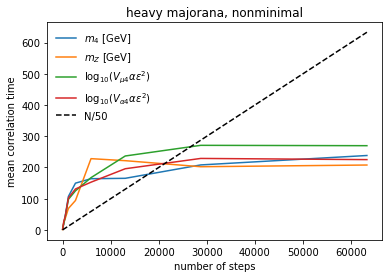

In [18]:
this_dark_nus_mcmc.compute_autocorrelation_time(store=True)

In [10]:
this_dark_nus_mcmc.get_samples(discard=2)

/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


(<Figure size 1080x504 with 5 Axes>,
 array([<AxesSubplot:ylabel='$m_4$ [GeV]'>,
        <AxesSubplot:ylabel='$m_Z$ [GeV]'>,
        <AxesSubplot:ylabel='$\\log_{10}(V_{\\mu 4}\\alpha \\epsilon^2)$'>,
        <AxesSubplot:ylabel='$\\log_{10}(V_{\\alpha 4}\\alpha \\epsilon^2)$'>,
        <AxesSubplot:xlabel='step number', ylabel='log(p)'>], dtype=object))

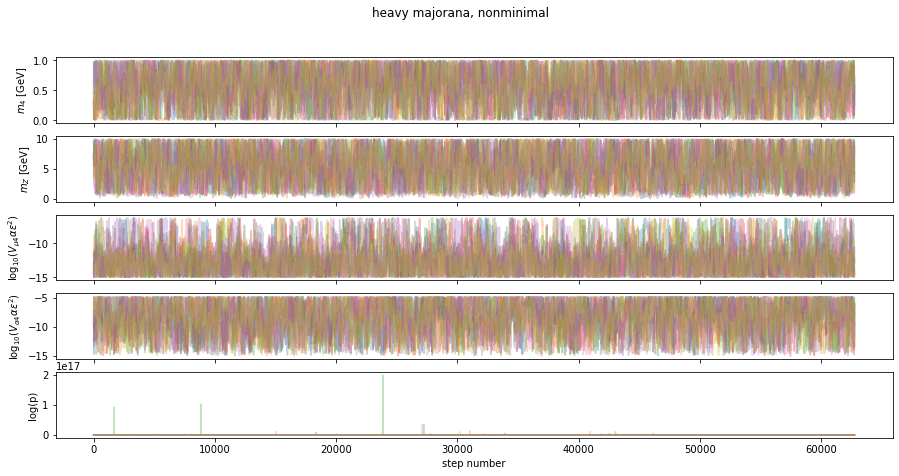

In [11]:
this_dark_nus_mcmc.plot_chains(store=True)

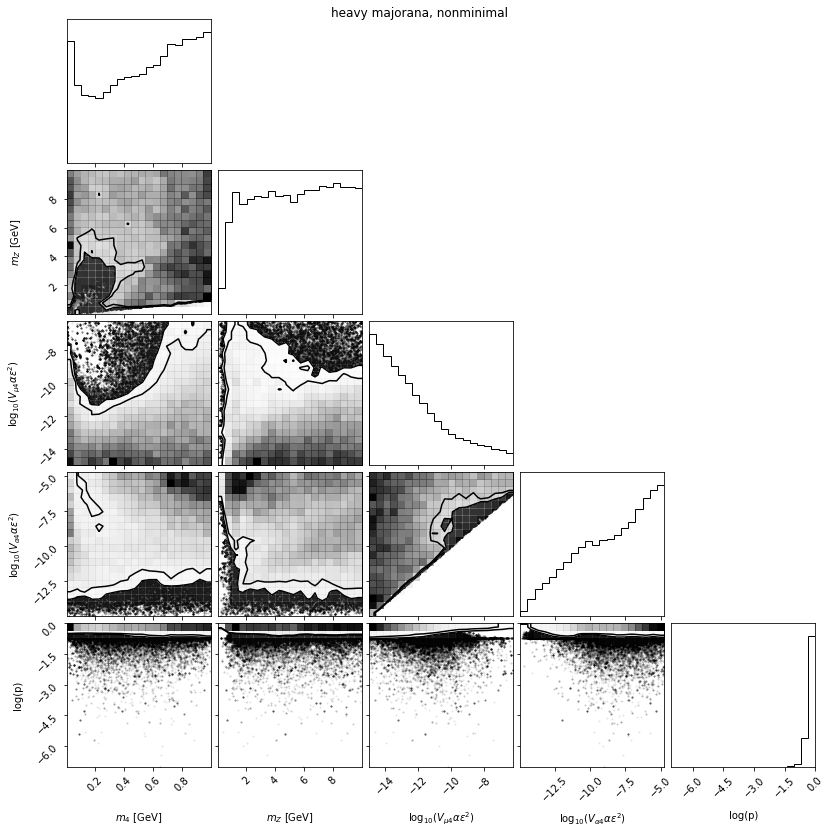

In [12]:
this_dark_nus_mcmc.corner_plot_raw(savefile='raw_corner')

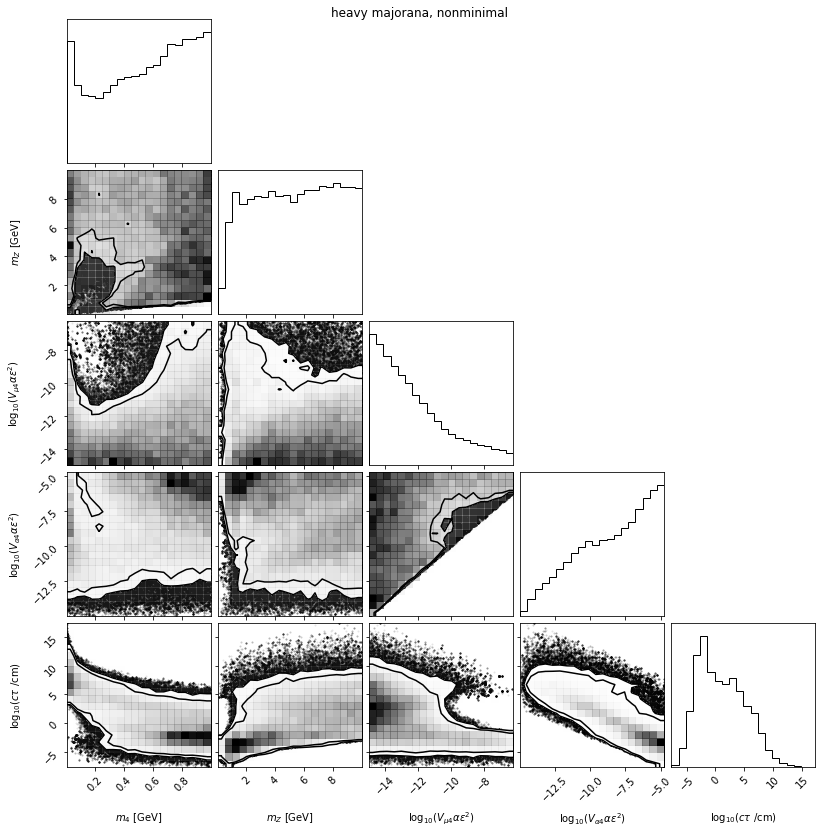

In [13]:
this_dark_nus_mcmc.corner_plot_physics(savefile='physics_corner')

In [14]:
print('Fraction of samples with null expectation =', (this_dark_nus_mcmc.samples['mu'] == 0).sum()/len(this_dark_nus_mcmc.samples))

Fraction of samples with null expectation = 0.47367973783308637


Removed no burn in


/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/getdist/chains.py:409: RuntimeWarning: invalid value encountered in subtract
  self.vars[i] = self.weights.dot((self.samples[:, i] - self.means[i]) ** 2) / self.norm
/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/getdist/chains.py:763: RuntimeWarning: invalid value encountered in subtract
  return [self.samples[:, i] - means[i] for i in range(pars)]


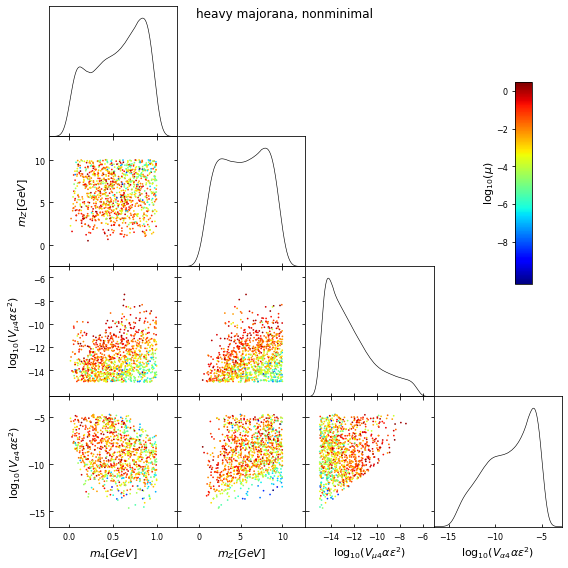

In [15]:
this_dark_nus_mcmc.corner_plot_with_colour('log10_mu', savefile='corner_log10_mu')

Removed no burn in


/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/getdist/chains.py:409: RuntimeWarning: invalid value encountered in subtract
  self.vars[i] = self.weights.dot((self.samples[:, i] - self.means[i]) ** 2) / self.norm
/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/getdist/chains.py:763: RuntimeWarning: invalid value encountered in subtract
  return [self.samples[:, i] - means[i] for i in range(pars)]


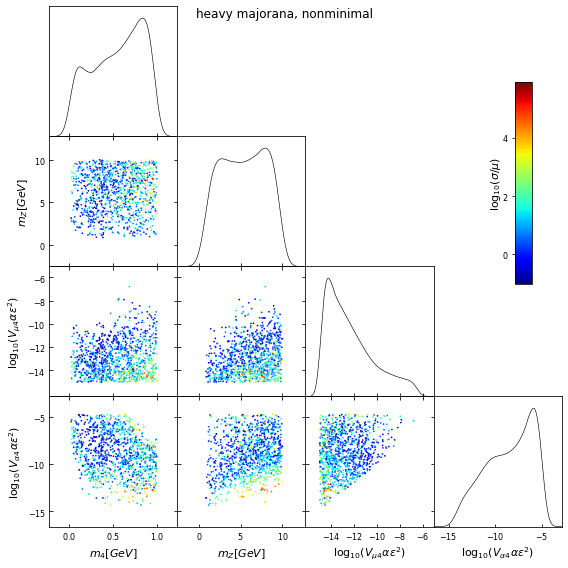

In [16]:
this_dark_nus_mcmc.corner_plot_with_colour('log10_sigma/mu', savefile='corner_log10_sigma_mu')

Removed no burn in


/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/getdist/chains.py:409: RuntimeWarning: invalid value encountered in subtract
  self.vars[i] = self.weights.dot((self.samples[:, i] - self.means[i]) ** 2) / self.norm
/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/getdist/chains.py:763: RuntimeWarning: invalid value encountered in subtract
  return [self.samples[:, i] - means[i] for i in range(pars)]


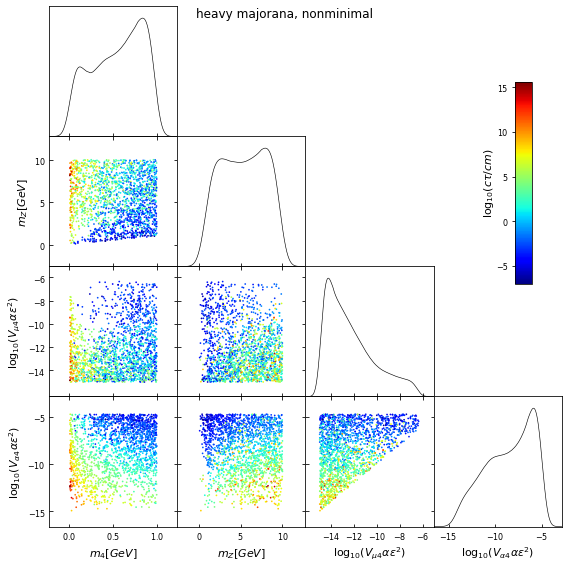

In [17]:
this_dark_nus_mcmc.corner_plot_with_colour('log10_ctau', savefile='corner_log10_ctau')